# ***Microsoft Stock Time Series***

**Statistical model for Time Series**

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
color_pal = sns.color_palette()
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MicrosoftStocks.csv to MicrosoftStocks.csv


In [ ]:
# Step 1: Load the dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['MicrosoftStocks.csv']))

In [ ]:
df.sample(5)

,Date,Price,Open,High,Low,Volume
5731,08/03/2000,35.12,34.09,35.19,34.06,54540000
8848,04/05/1988,0.39,0.39,0.39,0.38,41760000
5659,11/14/2000,34.41,34.00,34.91,33.66,84220000
136,10/27/2022,226.75,231.04,233.69,225.78,40420000
7263,07/12/1994,3.00,3.02,3.02,2.93,83710000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9369 entries, 0 to 9368
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9369 non-null   object 
 1   Price   9369 non-null   float64
 2   Open    9369 non-null   float64
 3   High    9369 non-null   float64
 4   Low     9369 non-null   float64
 5   Volume  9369 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 439.3+ KB


Convert type of column {Date} to datetype

In [ ]:
df['Date'] = pd.to_datetime(df.Date)

Make Column Date as Index

In [ ]:
df = df.set_index('Date')

In [ ]:
df.sample(10)

,Price,Open,High,Low,Volume
Date,,,,,
2016-07-22,56.57,56.08,56.63,55.78,32159999
1996-04-01,6.42,6.45,6.47,6.38,31690000
2018-09-04,111.71,110.85,111.95,110.22,22630000
1995-04-05,4.41,4.37,4.41,4.30,65790000
2013-09-04,31.20,31.39,31.47,31.11,142320000
1996-03-08,5.95,5.97,6.09,5.92,108540000
2003-09-16,28.90,28.41,28.95,28.32,52370000
2001-12-13,33.13,33.56,34.19,33.04,53230000
1997-09-02,17.15,16.64,17.19,16.62,50110000


Simple of Feature Engineering

In [ ]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour

In [ ]:
df['quarter'] = df.index.quarter

In [ ]:
df.sample(10)

,Price,Open,High,Low,Volume,year,month,day,hour,quarter
Date,,,,,,,,,,
2000-03-23,55.94,53.41,56.44,53.31,148220000,2000,3,23,0,1
2014-02-13,37.61,37.33,37.86,37.33,37650000,2014,2,13,0,1
2018-01-16,88.35,90.10,90.79,88.01,36600000,2018,1,16,0,1
1992-02-04,2.59,2.61,2.63,2.55,58440000,1992,2,4,0,1
2014-08-27,44.87,44.90,45.00,44.76,21290000,2014,8,27,0,3
2009-10-21,26.58,26.46,26.75,26.39,61670000,2009,10,21,0,4
2010-09-30,24.49,24.61,24.83,24.36,61270000,2010,9,30,0,3
1996-07-23,7.01,7.50,7.51,6.89,257690000,1996,7,23,0,3
1991-06-20,1.40,1.40,1.42,1.38,189900000,1991,6,20,0,2


In [ ]:
start_date = df.index.min()
last_date = df.index.max()

Get data by year for visualization it

In [ ]:
def get_data_by_year(data, year):
    d = data[df['year'] == year]
    return d

In [ ]:
set(df.year.values)

{1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023}

In [ ]:
d_2015 = get_data_by_year(df, 2015)
d_2016 = get_data_by_year(df, 2016)
d_2017 = get_data_by_year(df, 2017)
d_2018 = get_data_by_year(df, 2018)
d_2019 = get_data_by_year(df, 2019)
d_2020 = get_data_by_year(df, 2020)
d_2021 = get_data_by_year(df, 2021)

Visualization Data

Volume by all years

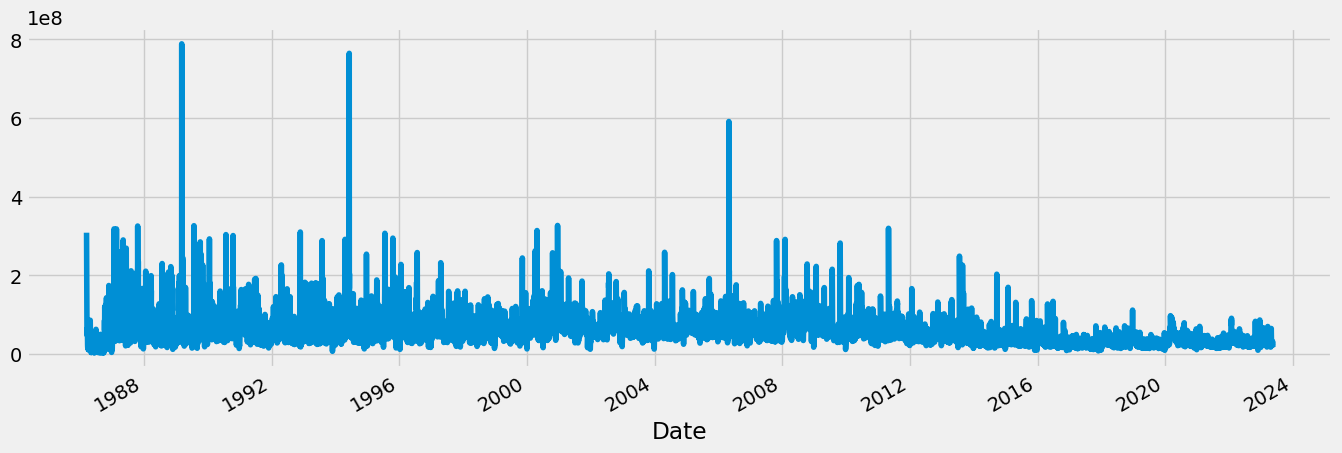

In [ ]:
df['Volume'].plot(figsize=(15,5))
plt.show()

Open by all years

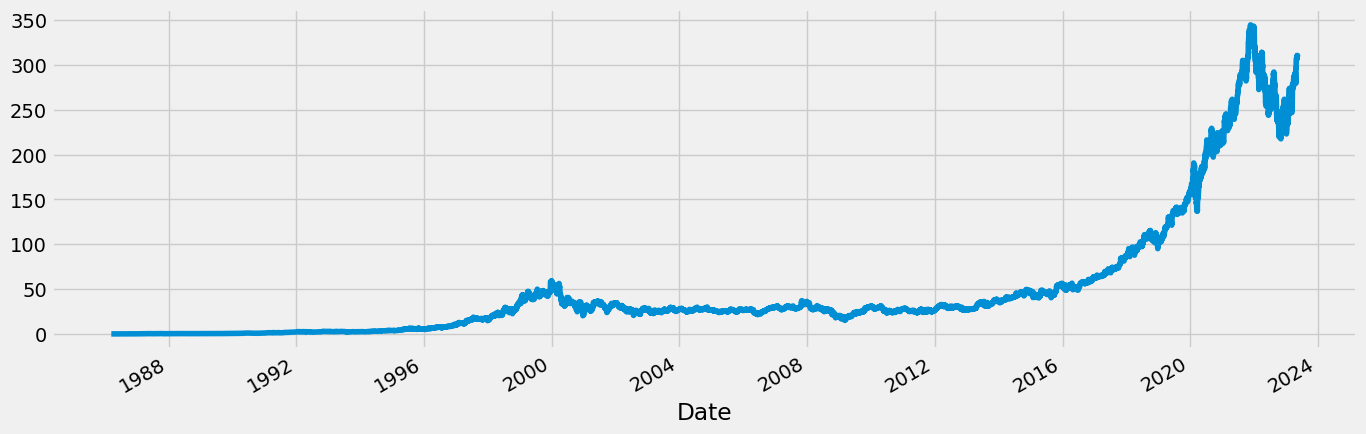

In [ ]:
df['Open'].plot(figsize=(15,5))
plt.show()

data with high volume in 2020

In [ ]:
data_high_volume_2020 = d_2020.loc[(d_2020.index>'2020-01-01') & (d_2020.index<'2020-04-01')]

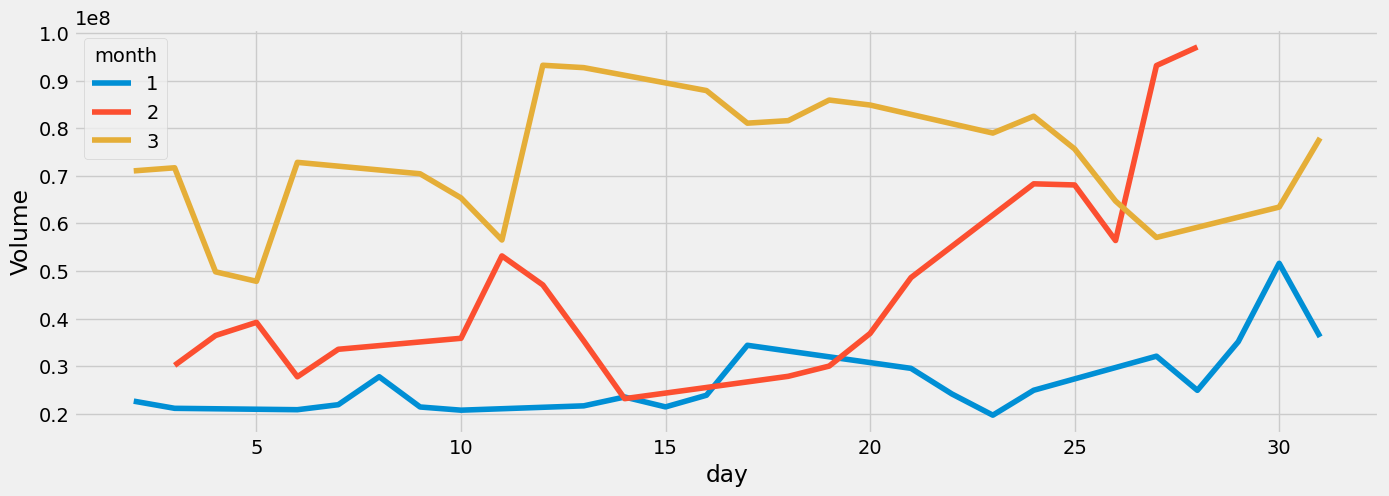

In [ ]:
plt.subplots(figsize=(15, 5))
sns.lineplot(data=data_high_volume_2020, x='day', y='Volume', hue='month',palette=color_pal, ci=False)
plt.show()

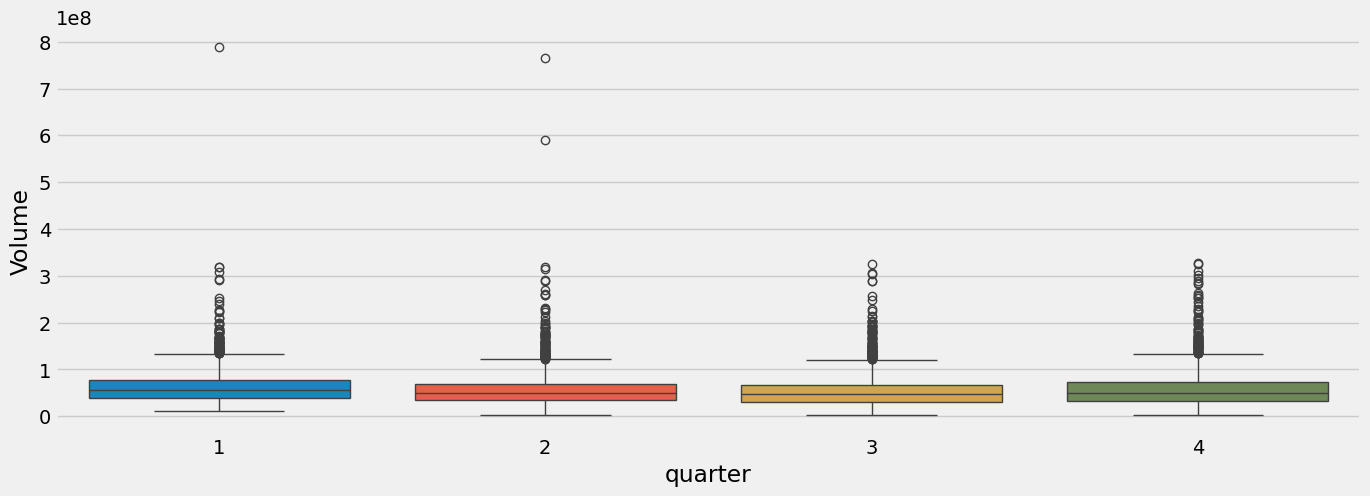

In [ ]:
plt.subplots(figsize=(15, 5))
sns.boxplot(data=df, x='quarter', y='Volume',palette=color_pal)
plt.show()

if the data is stationary or not

In [ ]:
def is_stationary(columnName):
    res = adfuller(columnName)
    if res[1] < 0.05:
        print('the data of {} is stationary series'.format(columnName.name))
    else:
        print('the data of {} is not stationary series'.format(columnName.name))

In [ ]:
is_stationary(df.Volume)

the data of Volume is stationary series


In [ ]:
is_stationary(df.Open)

the data of Open is stationary series


In [ ]:
is_stationary(df.High)

the data of High is stationary series


In [ ]:
is_stationary(df.Low)

the data of Low is stationary series


Convert all data that is not stationary to stationary data

In [ ]:
df_open_diff = df.Open - df.Open.shift(freq='D')
df_open_diff = df_open_diff.dropna()


df_high_diff = df.High - df.High.shift(freq='D')
df_high_diff = df_high_diff.dropna()

df_low_diff = df.Low - df.Low.shift(freq='D')
df_low_diff = df_low_diff.dropna()

In [ ]:
is_stationary(df_open_diff)
is_stationary(df_high_diff)
is_stationary(df_low_diff)

the data of Open is stationary series
the data of High is stationary series
the data of Low is stationary series


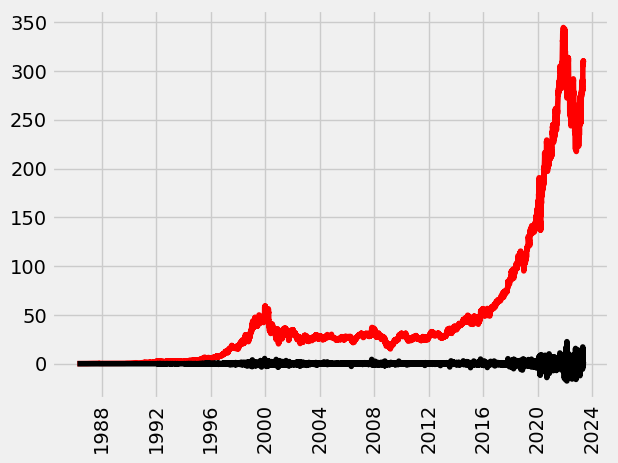

In [ ]:
plt.plot(df.Open, color = "red",label = "Original")
plt.plot(df_open_diff, color='black', label = "deff shiffting")
plt.xticks(rotation=90)
plt.show()

Using ACF to know Stationary or not

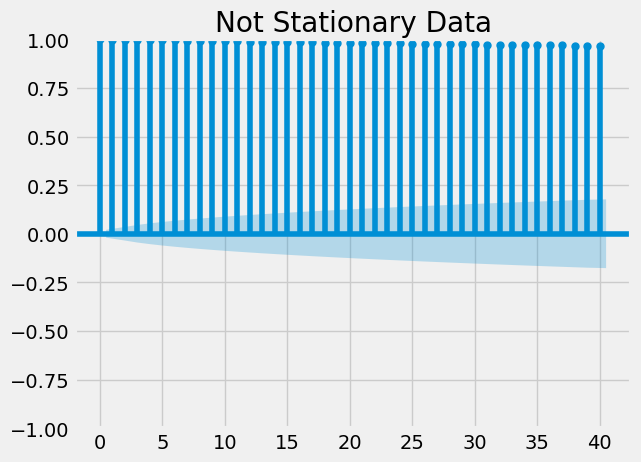

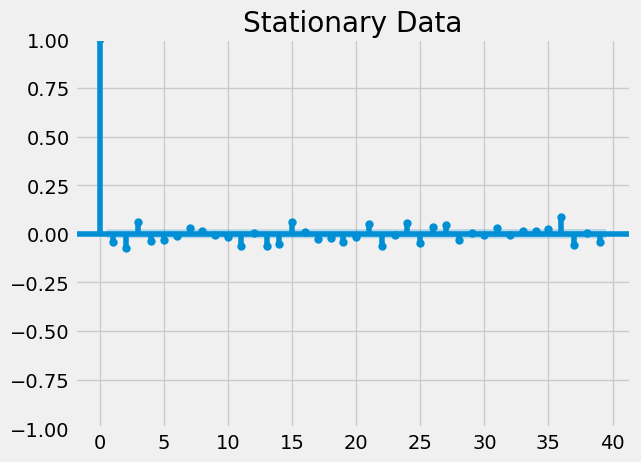

In [ ]:
plot_acf(df.Open)
plt.title('Not Stationary Data')
plt.show()
plot_acf(df_open_diff)
plt.title('Stationary Data')
plt.show()

In [ ]:
data_stationary = pd.concat([df_open_diff, df_high_diff, df_low_diff, df.Volume], axis=1)
data_stationary = data_stationary.dropna()

In [ ]:
data_stationary.sample(10)

,Open,High,Low,Volume
Date,,,,
1992-06-17,-0.09,-0.10,-0.04,70030000
1998-07-30,-0.33,-0.15,0.17,72750000
2012-04-25,-0.29,-0.20,0.04,62500000
1990-01-17,-0.01,0.01,0.01,97590000
2015-09-30,0.51,0.73,0.61,34960000
1997-06-05,-0.05,-0.09,0.16,35890000
1988-08-25,-0.01,0.00,0.01,72630000
2009-09-17,-0.19,0.03,0.11,42430000
2011-05-10,-0.42,-0.11,-0.42,120810000


# **Statistical Model for Time Series**

**ARIMA Model**

In [ ]:
test_arima = auto_arima(df_open_diff, trace=True, suppers_warnings=True)
test_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=13.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32501.868, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30515.468, Time=0.68 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32499.868, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=29152.760, Time=1.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=28777.656, Time=1.35 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=28504.613, Time=1.92 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=28301.342, Time=3.58 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=34.43 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=24.40 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=28299.342, Time=1.09 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=28502.613, Time=0.89 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=5.42 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7344
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -14143.671
Date:                Sat, 06 Jul 2024   AIC                          28299.342
Time:                        16:16:16   BIC                          28340.751
Sample:                             0   HQIC                         28313.577
                               - 7344                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8545      0.004   -230.149      0.000      -0.862      -0.847
ar.L2         -0.7362      0.005   -137.566      0.000      -0.747      -0.726
ar.L3         -0.4853      0.005    -89.518      0.000      -0.496      -0.475
ar.L4         -0.3283      0.004    -77.704      0.000      -0.337      -0.320
ar.L5         -0.1660      0.003    -50.624      0.000      -0.172      -0.160
sigma2         2.7573      0.011    259.979      0.000       2.737       2.778
===================================================================================
Ljung-Box (L1) (Q):                   7.17   Jarque-Bera (JB):            430796.26
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):             243.12   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Split Data

In [ ]:
train = df_open_diff.loc[df_open_diff.index < '01-01-2020']
test = df_open_diff.loc[df_open_diff.index >= '01-01-2020']

In [ ]:
train.shape

(6676,)

In [ ]:
test.shape

(668,)

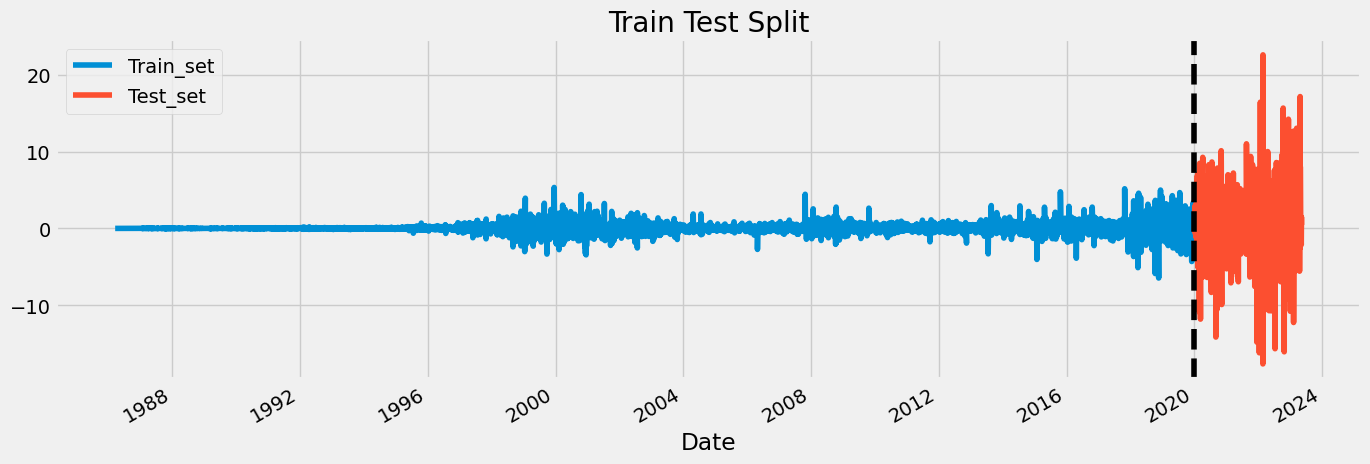

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax)
test.plot(ax=ax)
ax.axvline('01-01-2020', color ='Black', ls='--')
plt.legend(['Train_set', 'Test_set'])
plt.title('Train Test Split')
plt.show()

Fitting the Model and get the Prediction

In [ ]:
model = sm.tsa.arima.ARIMA(train, order=(2,0,3))
model_fit = model.fit()

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

In [ ]:
forecast = model_fit.predict(start=start, end=end)
forecast.index = df_open_diff.index[start:end+1]
forecast

Date
2020-01-03   -0.007855
2020-01-07    0.184828
2020-01-08   -0.114073
2020-01-09    0.107277
2020-01-10    0.049384
                ...   
2023-05-05    0.031052
2023-05-09    0.031052
2023-05-10    0.031052
2023-05-11    0.031052
2023-05-12    0.031052
Name: predicted_mean, Length: 668, dtype: float64

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae_arima = mean_absolute_error(test, forecast)
print("Mean Absolute Error (MAE) for ARIMA:", mae_arima)

# Calculate Mean Squared Error (MSE)
mse_arima = mean_squared_error(test, forecast)
print("Mean Squared Error (MSE) for ARIMA:", mse_arima)

# Calculate Root Mean Squared Error (RMSE)
rmse_arima = np.sqrt(mse_arima)
print("Root Mean Squared Error (RMSE) for ARIMA:", rmse_arima)

Mean Absolute Error (MAE) for ARIMA: 3.4581982235114848
Mean Squared Error (MSE) for ARIMA: 21.747352730837232
Root Mean Squared Error (RMSE) for ARIMA: 4.66340570086254


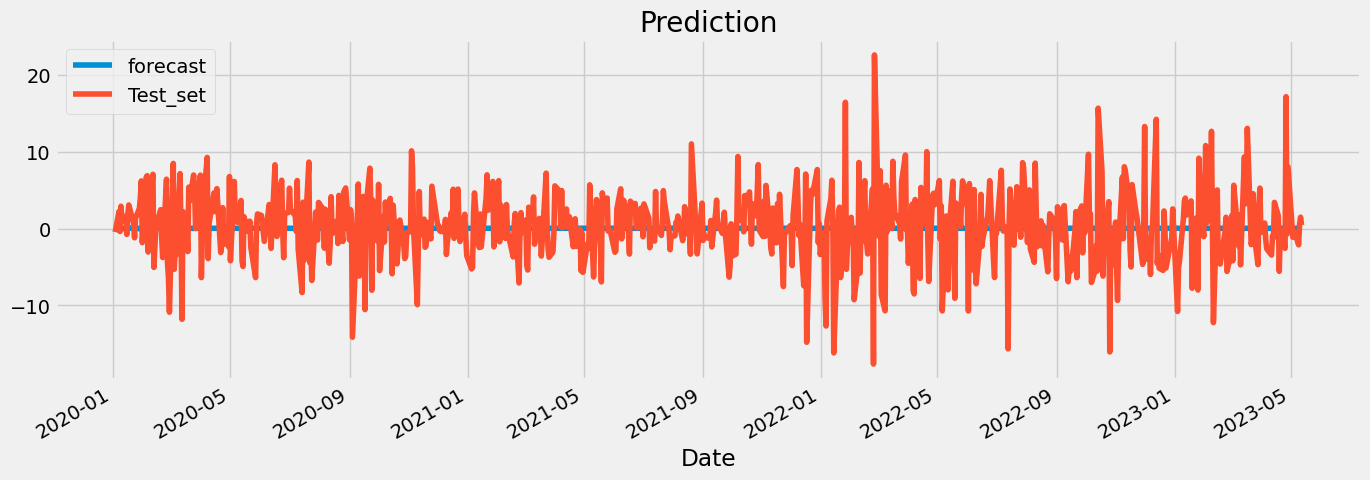

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
forecast.plot(ax=ax)
test.plot(ax=ax)
plt.legend(['forecast', 'Test_set'])
plt.title('Prediction')
plt.show()

###**The ARIMA model, which stands for AutoRegressive Integrated Moving Average, is a time series forecasting technique that captures the linear relationship between an observation and a number of lagged observations. Its performance metrics indicate that it provides reasonably accurate predictions but may not capture all the nuances in the data.**

---



**SARIMA (Seasonal ARIMA) Model**

In [ ]:
# Using auto_arima to get best hyperparameters for SARIMA Model
from pmdarima import auto_arima

# SARIMA Model
# Fit SARIMA model
sarima_model = auto_arima(df_open_diff, trace=True, suppress_warnings=True)
sarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=15.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32501.868, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30515.468, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32499.868, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=29152.760, Time=1.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=28777.656, Time=1.50 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=28504.613, Time=3.15 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=28301.342, Time=2.37 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=33.69 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=23.49 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=28299.342, Time=1.08 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=28502.613, Time=0.87 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=5.51 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7344
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -14143.671
Date:                Sat, 06 Jul 2024   AIC                          28299.342
Time:                        16:21:37   BIC                          28340.751
Sample:                             0   HQIC                         28313.577
                               - 7344                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8545      0.004   -230.149      0.000      -0.862      -0.847
ar.L2         -0.7362      0.005   -137.566      0.000      -0.747      -0.726
ar.L3         -0.4853      0.005    -89.518      0.000      -0.496      -0.475
ar.L4         -0.3283      0.004    -77.704      0.000      -0.337      -0.320
ar.L5         -0.1660      0.003    -50.624      0.000      -0.172      -0.160
sigma2         2.7573      0.011    259.979      0.000       2.737       2.778
===================================================================================
Ljung-Box (L1) (Q):                   7.17   Jarque-Bera (JB):            430796.26
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):             243.12   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# SARIMA(2,0,3)
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Split Data
train = df_open_diff.loc[df_open_diff.index < '01-01-2020']
test = df_open_diff.loc[df_open_diff.index >= '01-01-2020']

In [ ]:
# Fitting the Model
model_sarima = SARIMAX(train, order=(2,0,3))
model_fit_sarima = model_sarima.fit()

In [ ]:
# Prediction
start = len(train)
end = len(train) + len(test) - 1
forecast_sarima = model_fit_sarima.predict(start=start, end=end)
forecast_sarima.index = df_open_diff.index[start:end+1]

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test, forecast_sarima)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test, forecast_sarima)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3.459574314499865
Mean Squared Error (MSE): 21.766272737189574
Root Mean Squared Error (RMSE): 4.665433820899143


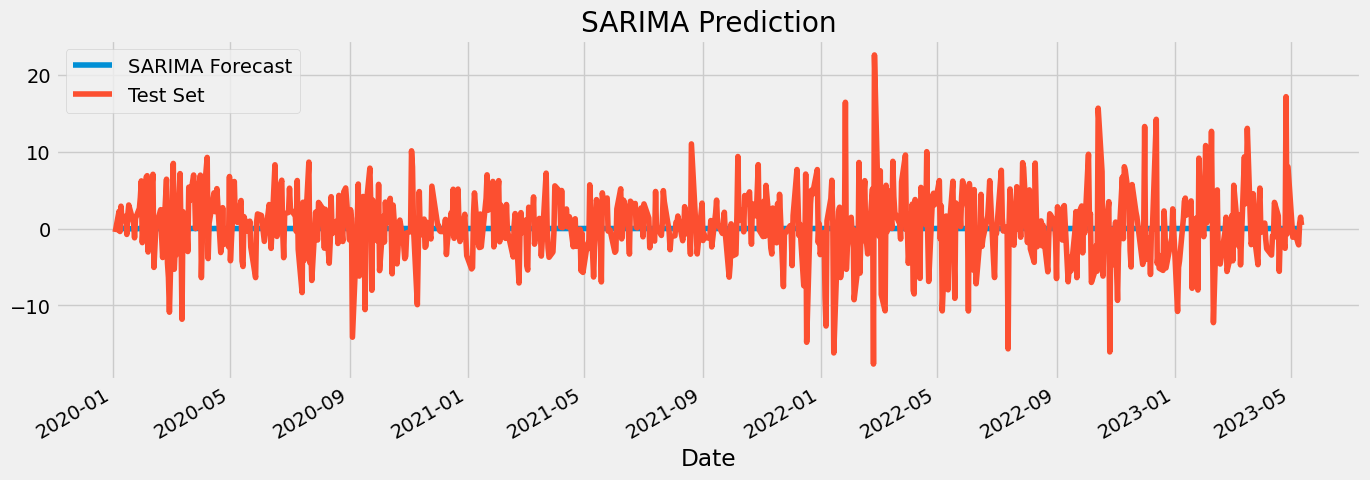

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(15, 5))
forecast_sarima.plot(ax=ax)
test.plot(ax=ax)
plt.legend(['SARIMA Forecast', 'Test Set'])
plt.title('SARIMA Prediction')
plt.show()

###**SARIMA, or Seasonal AutoRegressive Integrated Moving Average, is an extension of the ARIMA model that also considers seasonal components in the time series data. While it accounts for seasonality, its performance metrics are similar to ARIMA, suggesting that seasonality might not significantly impact the predictions in this particular dataset.**

---



**ARIMAX (AutoRegressive Integrated Moving Average with Exogenous Variables) model**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Using auto_arima to get the best hyperparameters for ARIMA Model
test_arima = auto_arima(df_open_diff, exogenous=df[['Volume', 'High', 'Low']], trace=True, suppress_warnings=True)
test_arima.summary()



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=16.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32501.868, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30515.468, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32499.868, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=29152.760, Time=1.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=28777.656, Time=1.32 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=28504.613, Time=1.96 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=28301.342, Time=2.59 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=34.17 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=22.57 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=28299.342, Time=1.76 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=28502.613, Time=1.22 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=5.36 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7344
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -14143.671
Date:                Sat, 06 Jul 2024   AIC                          28299.342
Time:                        16:29:01   BIC                          28340.751
Sample:                             0   HQIC                         28313.577
                               - 7344                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8545      0.004   -230.149      0.000      -0.862      -0.847
ar.L2         -0.7362      0.005   -137.566      0.000      -0.747      -0.726
ar.L3         -0.4853      0.005    -89.518      0.000      -0.496      -0.475
ar.L4         -0.3283      0.004    -77.704      0.000      -0.337      -0.320
ar.L5         -0.1660      0.003    -50.624      0.000      -0.172      -0.160
sigma2         2.7573      0.011    259.979      0.000       2.737       2.778
===================================================================================
Ljung-Box (L1) (Q):                   7.17   Jarque-Bera (JB):            430796.26
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):             243.12   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Split Data
train = df_open_diff.loc[df_open_diff.index < '2020-01-01']
test = df_open_diff.loc[df_open_diff.index >= '2020-01-01']

# Fitting the Model and getting the Prediction
model_arimax = SARIMAX(train, exog=df.loc[train.index, ['Volume', 'High', 'Low']], order=(2,0,3))
model_fit_arimax = model_arimax.fit()

start = len(train)
end = len(train) + len(test) - 1

forecast_arimax = model_fit_arimax.predict(start=start, end=end, exog=df.loc[test.index, ['Volume', 'High', 'Low']])
forecast_arimax.index = df_open_diff.index[start:end+1]


In [ ]:
# Evaluation
mae_arimax = mean_absolute_error(test, forecast_arimax)
mse_arimax = mean_squared_error(test, forecast_arimax)
rmse_arimax = np.sqrt(mse_arimax)

print("Mean Absolute Error (MAE) for ARIMAX:", mae_arimax)
print("Mean Squared Error (MSE) for ARIMAX:", mse_arimax)
print("Root Mean Squared Error (RMSE) for ARIMAX:", rmse_arimax)

Mean Absolute Error (MAE) for ARIMAX: 3.4629288133959717
Mean Squared Error (MSE) for ARIMAX: 21.525875483158405
Root Mean Squared Error (RMSE) for ARIMAX: 4.639598633843062


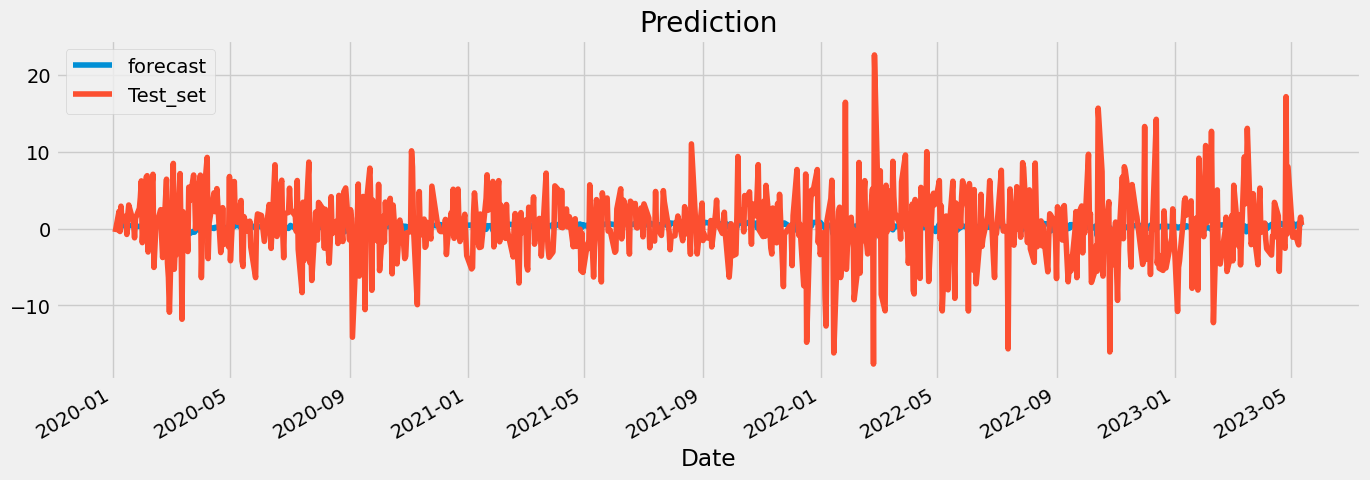

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(15, 5))
forecast_arimax.plot(ax=ax)
test.plot(ax=ax)
plt.legend(['forecast', 'Test_set'])
plt.title('Prediction')
plt.show()

###**The ARIMAX model extends ARIMA by incorporating exogenous variables, which are external factors that can influence the time series. In this case, including these additional variables has led to improved predictive accuracy, as evidenced by the lower error metrics compared to the basic ARIMA and SARIMA models.**

---



**Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors (SARIMAX)**

In [ ]:
#Fitting the Model and getting the Prediction
model_sarimax = SARIMAX(train, exog=df.loc[train.index, ['Volume', 'High', 'Low']], order=(2,0,3))
model_fit_sarimax = model_sarimax.fit()

start = len(train)
end = len(train) + len(test) - 1

forecast_sarimax = model_fit_sarimax.predict(start=start, end=end, exog=df.loc[test.index, ['Volume', 'High', 'Low']])
forecast_sarimax.index = df_open_diff.index[start:end+1]



In [ ]:
# Evaluation
mae_sarimax = mean_absolute_error(test, forecast_sarimax)
mse_sarimax = mean_squared_error(test, forecast_sarimax)
rmse_sarimax = np.sqrt(mse_sarimax)

print("Mean Absolute Error (MAE) for SARIMAX:", mae_sarimax)
print("Mean Squared Error (MSE) for SARIMAX:", mse_sarimax)
print("Root Mean Squared Error (RMSE) for SARIMAX:", rmse_sarimax)

Mean Absolute Error (MAE) for SARIMAX: 3.4629288133959717
Mean Squared Error (MSE) for SARIMAX: 21.525875483158405
Root Mean Squared Error (RMSE) for SARIMAX: 4.639598633843062


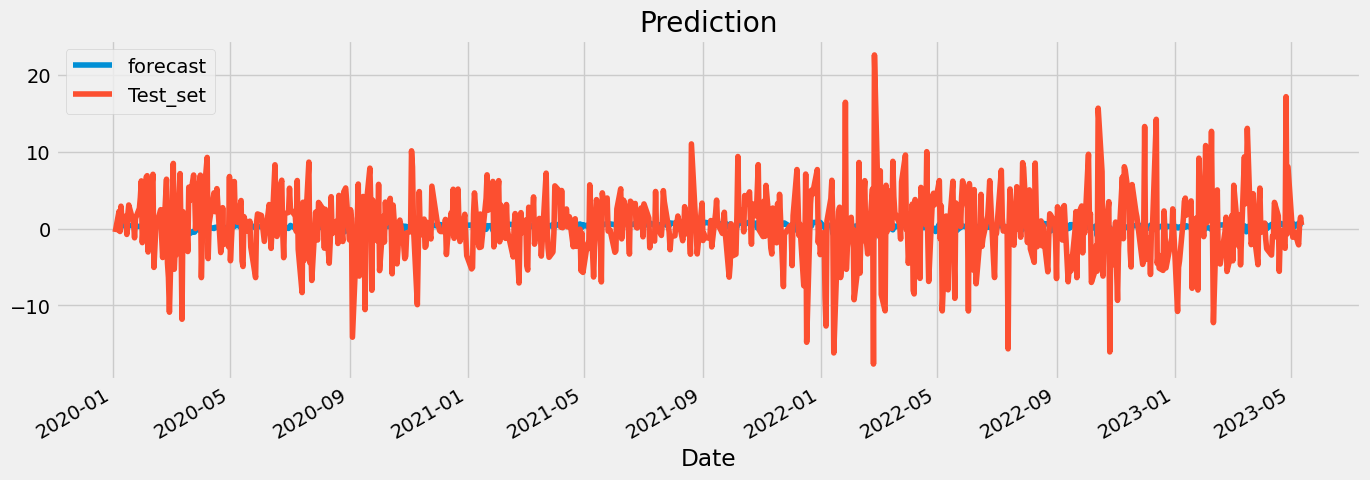

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(15, 5))
forecast_sarimax.plot(ax=ax)
test.plot(ax=ax)
plt.legend(['forecast', 'Test_set'])
plt.title('Prediction')
plt.show()

###**SARIMAX, similar to ARIMAX, incorporates both seasonal components and exogenous variables. As with ARIMAX, its performance metrics are superior to the basic SARIMA model, indicating that both seasonality and external factors play a significant role in the dataset**.

---



## Deep learning models

CNN Model

Epoch 1/20
234/234 [==============================] - 2s 4ms/step - loss: 0.0012 - val_loss: 2.9815e-05
Epoch 2/20
234/234 [==============================] - 1s 4ms/step - loss: 1.6950e-04 - val_loss: 9.1710e-06
Epoch 3/20
234/234 [==============================] - 1s 4ms/step - loss: 1.8167e-04 - val_loss: 2.9906e-05
Epoch 4/20
234/234 [==============================] - 1s 4ms/step - loss: 1.4557e-04 - val_loss: 1.7025e-05
Epoch 5/20
234/234 [==============================] - 1s 4ms/step - loss: 2.1089e-04 - val_loss: 2.3031e-05
Epoch 6/20
234/234 [==============================] - 1s 4ms/step - loss: 1.3002e-04 - val_loss: 3.2990e-05
Epoch 7/20
234/234 [==============================] - 1s 4ms/step - loss: 1.1672e-04 - val_loss: 3.2837e-05
Epoch 8/20
234/234 [==============================] - 1s 4ms/step - loss: 1.0340e-04 - val_loss: 1.7227e-05
Epoch 9/20
234/234 [==============================] - 1s 5ms/step - loss: 1.5334e-04 - val_loss: 8.3437e-05
Epoch 10/20
234/234 [===========

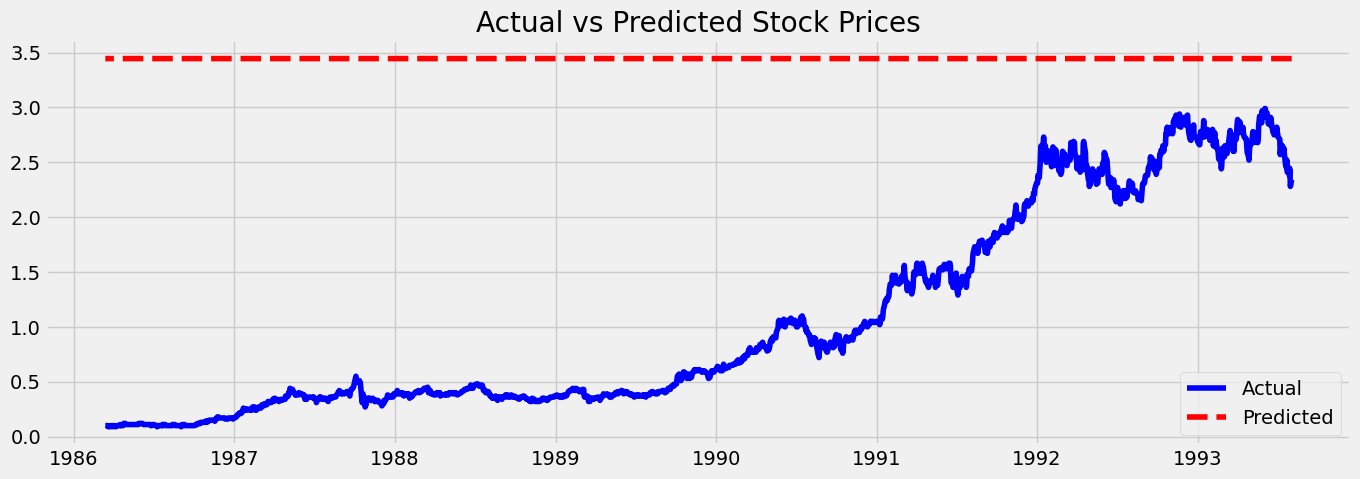

Root Mean Squared Error: 2.557589291281842


In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, MaxPooling1D

# Load and preprocess the data
df = pd.read_csv('MicrosoftStocks.csv')
df['Date'] = pd.to_datetime(df.Date)
df = df.set_index('Date')
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['quarter'] = df.index.quarter

# Use the 'Open' column for prediction
data = df[['Open']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Convert time series to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 30  # you can adjust this value
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape data for CNN (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(SEQ_LENGTH, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Fit the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Make predictions
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)  # Inverse transform to get actual values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(df.index[-len(y_test):], y_test_actual, color='blue', label='Actual')
plt.plot(df.index[-len(y_test):], predicted, color='red', linestyle='--', label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.show()

# Calculate and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted))
print(f'Root Mean Squared Error: {rmse}')

In [83]:
pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.9 MB/s eta 0:00:00


In [89]:
pip install keras-tcn

TCN model

Epoch 1/20
234/234 [==============================] - 17s 54ms/step - loss: 0.0852 - val_loss: 1.6480e-05
Epoch 2/20
234/234 [==============================] - 12s 51ms/step - loss: 1.7595e-04 - val_loss: 7.5609e-06
Epoch 3/20
234/234 [==============================] - 12s 51ms/step - loss: 3.1860e-04 - val_loss: 7.0242e-06
Epoch 4/20
234/234 [==============================] - 12s 51ms/step - loss: 2.3891e-04 - val_loss: 4.4205e-06
Epoch 5/20
234/234 [==============================] - 12s 53ms/step - loss: 3.2725e-04 - val_loss: 9.5304e-06
Epoch 6/20
234/234 [==============================] - 12s 53ms/step - loss: 2.4366e-04 - val_loss: 1.5266e-05
Epoch 7/20
234/234 [==============================] - 12s 51ms/step - loss: 6.3349e-04 - val_loss: 3.2233e-05
Epoch 8/20
234/234 [==============================] - 12s 53ms/step - loss: 7.7674e-04 - val_loss: 1.4109e-05
Epoch 9/20
234/234 [==============================] - 12s 52ms/step - loss: 3.0154e-04 - val_loss: 4.0789e-06
Epoch 10/20
23

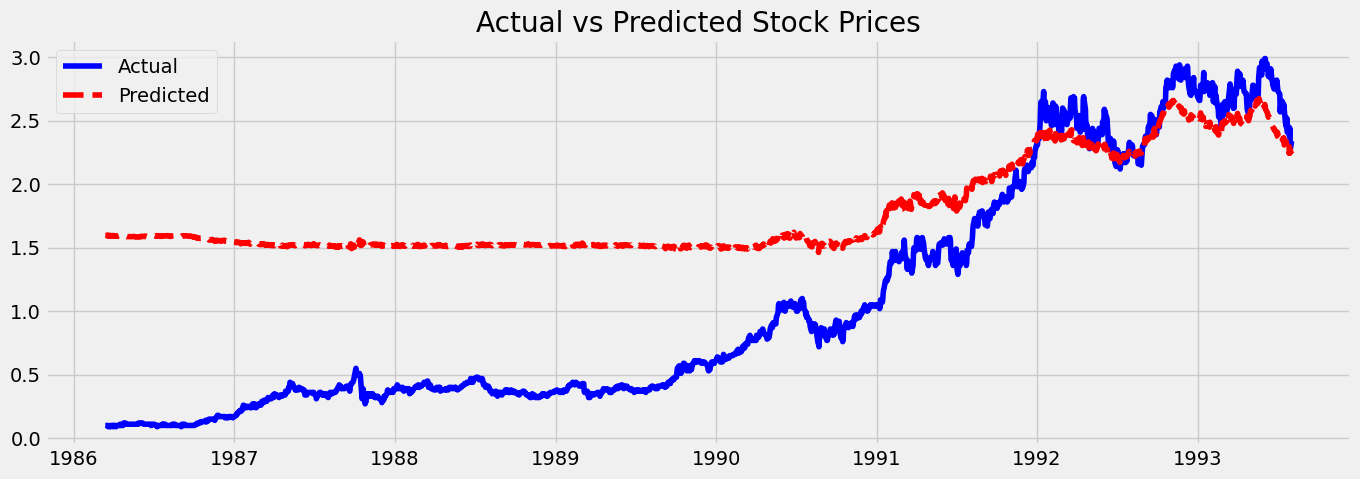

Root Mean Squared Error: 0.9192432629644728


In [90]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tcn import TCN

# Load and preprocess the data
df = pd.read_csv('MicrosoftStocks.csv')
df['Date'] = pd.to_datetime(df.Date)
df = df.set_index('Date')
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['quarter'] = df.index.quarter

# Use the 'Open' column for prediction
data = df[['Open']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Convert time series to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 30  # you can adjust this value
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape data for TCN (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the TCN model
model = Sequential()
model.add(TCN(input_shape=(SEQ_LENGTH, 1)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Fit the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Make predictions
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)  # Inverse transform to get actual values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(df.index[-len(y_test):], y_test_actual, color='blue', label='Actual')
plt.plot(df.index[-len(y_test):], predicted, color='red', linestyle='--', label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.show()

# Calculate and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted))
print(f'Root Mean Squared Error: {rmse}')

TCN-LSTM

Epoch 1/20
234/234 [==============================] - 5s 12ms/step - loss: 0.0030 - val_loss: 3.6488e-05
Epoch 2/20
234/234 [==============================] - 2s 10ms/step - loss: 1.3362e-04 - val_loss: 2.8850e-05
Epoch 3/20
234/234 [==============================] - 2s 11ms/step - loss: 1.2316e-04 - val_loss: 1.5231e-05
Epoch 4/20
234/234 [==============================] - 4s 15ms/step - loss: 1.2504e-04 - val_loss: 1.8928e-06
Epoch 5/20
234/234 [==============================] - 3s 12ms/step - loss: 1.1564e-04 - val_loss: 1.3858e-05
Epoch 6/20
234/234 [==============================] - 3s 11ms/step - loss: 1.0487e-04 - val_loss: 9.1943e-07
Epoch 7/20
234/234 [==============================] - 2s 10ms/step - loss: 1.1073e-04 - val_loss: 5.3572e-06
Epoch 8/20
234/234 [==============================] - 2s 11ms/step - loss: 1.0317e-04 - val_loss: 1.4963e-06
Epoch 9/20
234/234 [==============================] - 3s 15ms/step - loss: 1.1291e-04 - val_loss: 1.0906e-05
Epoch 10/20
234/234 [==

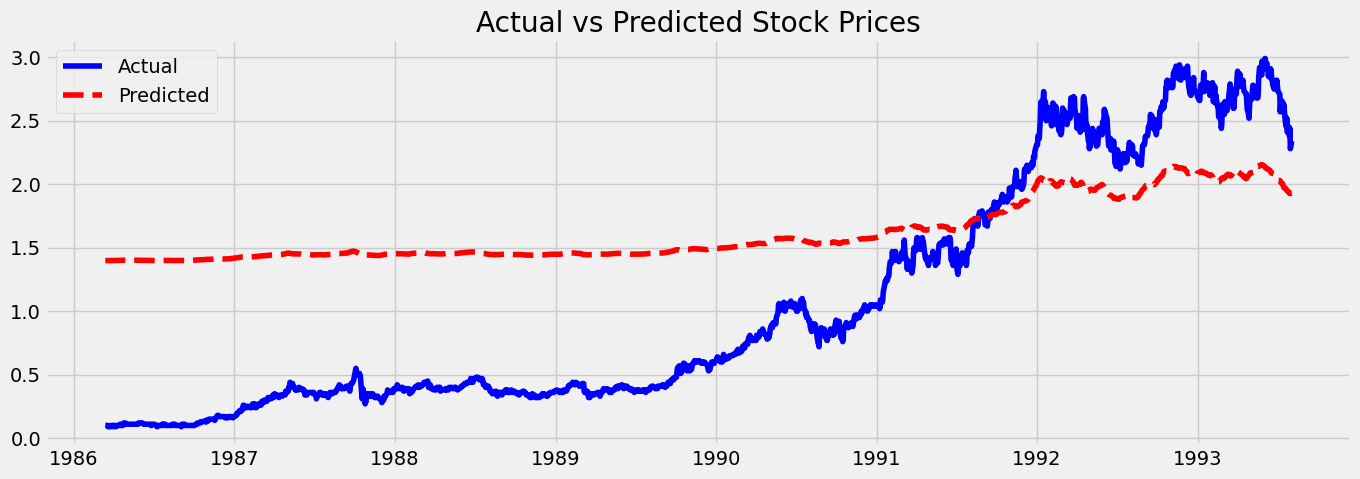

Root Mean Squared Error: 0.8850050661838759


In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, LSTM

# Load and preprocess the data
df = pd.read_csv('MicrosoftStocks.csv')
df['Date'] = pd.to_datetime(df.Date)
df = df.set_index('Date')
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['quarter'] = df.index.quarter

# Use the 'Open' column for prediction
data = df[['Open']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Convert time series to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 30  # you can adjust this value
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape data for CNN-LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(SEQ_LENGTH, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Fit the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Make predictions
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)  # Inverse transform to get actual values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(df.index[-len(y_test):], y_test_actual, color='blue', label='Actual')
plt.plot(df.index[-len(y_test):], predicted, color='red', linestyle='--', label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.show()

# Calculate and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted))
print(f'Root Mean Squared Error: {rmse}')

Hyperparameter Tuning for TCN Model

In [92]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


### comparison

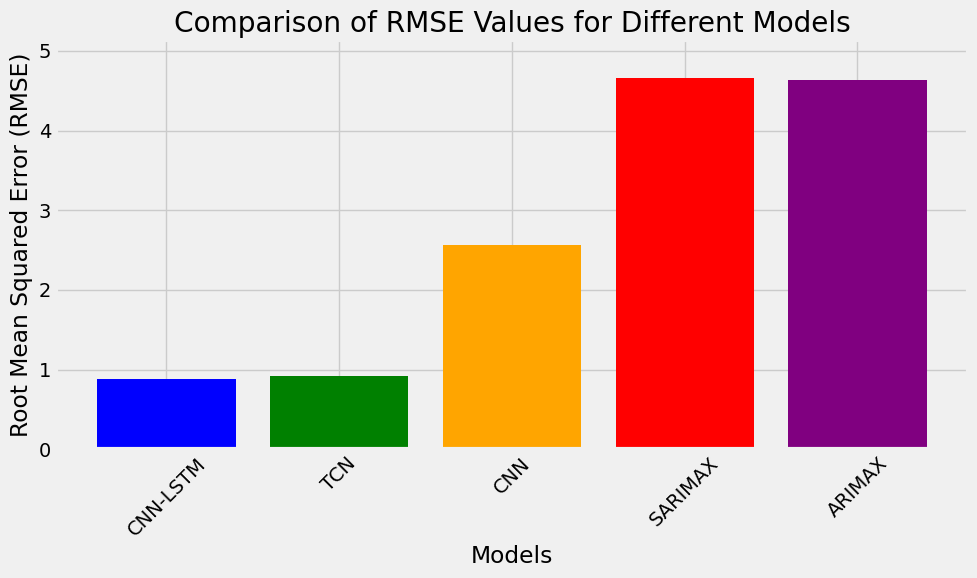

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# RMSE values for each model
models = ['CNN-LSTM', 'TCN', 'CNN', 'SARIMAX', 'ARIMAX']
rmse_values = [0.885, 0.919, 2.558, 4.66543, 4.63959]  # Replace with your actual RMSE values

# Plotting RMSE values
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of RMSE Values for Different Models')
plt.ylim(0, max(rmse_values) * 1.1)  # Adjust ylim if necessary
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()